In [1]:
%load_ext autoreload
%autoreload 

In [92]:

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
from pathlib import Path
os.chdir('/home/ali/packages/s2p-lbm/')

import suite2p

In [72]:
os.getcwd()

'/home/ali/packages/s2p-lbm'

In [71]:
from analysis import plot

ModuleNotFoundError: No module named 'analysis'

In [31]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'SS003',
    'date' :          '2024-08-15',
    'expnum' :         [1,2,3,4],}

fixed_tif_dir = '/mnt/md0/runs/s3d-SS003_2024-08-15_1-2-3-4/raw
'

In [93]:
save_dir = Path('/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/')

In [52]:
ops = suite2p.default_ops()
ops['look_one_level_down'] = True
ops['subfolders'] = ['1','2','3','4']
ops['nplanes'] = 7
ops['fs'] = 4.284
ops['batch_size'] = 400
ops['threshold_scaling'] = 1.0
ops['tau'] = 1.3
ops['nonrigid'] = False
ops['ignore_flyback'] = [0,1]
ops['data_path'] = [fixed_tif_dir]
ops['save_path0'] = str(save_dir)
# print(ops)

In [89]:
ops['nbinned'] = 15000

In [54]:
%%time
output_ops = suite2p.run_s2p(ops=ops)

{}
FOUND BINARIES AND OPS IN ['/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane0/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane1/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane2/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane3/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane4/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane5/ops.npy', '/mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane6/ops.npy']
removing previous detection and extraction files, if present
>>>> skipping flyback PLANE 0
>>>> skipping flyback PLANE 1
>>>>>>>>>>>>>>>>>>>>> PLANE 2 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
binary path: /mnt/md0/runs/s2p-SS003_2024-08-15_1-2-3-4/suite2p/plane2/data.bin
NOTE: Applying builtin classifier at /home/ali/anaconda3/envs/s2p/lib/python3.9/site-packages/suite2p/classifiers/classifier.npy
----------- ROI DETECTION
Binning movie in chun

In [63]:
output_ops['regPC'].shape

(2, 30, 496, 500)

In [67]:
output_ops['tPC'].shape

(5000, 30)

In [69]:
output_ops['regPC'].shape

(2, 30, 496, 500)

In [79]:
output_ops['regPC'][0,0].min()

np.float32(12.06)

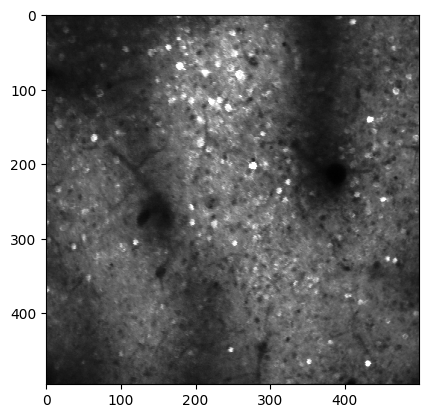

In [84]:
plt.imshow(output_ops['regPC'][0,0], cmap='Greys_r', vmin=0, vmax=1e4)

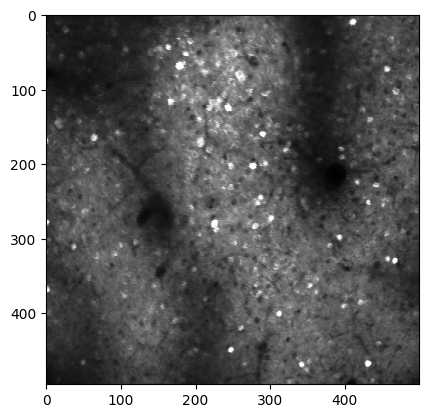

In [85]:

plt.imshow(output_ops['regPC'][1,0], cmap='Greys_r', vmin=0, vmax=1e4)

In [127]:
all_ops = []
all_stats = []
for plane in n.arange(2,7):
    planedir = (save_dir / 'suite2p' / f'plane{plane}')
    statx = planedir / 'stat.npy'
    opx = planedir / 'ops.npy'

    all_stats.append(n.load(statx, allow_pickle=True))
    all_ops.append(n.load(opx, allow_pickle=True).item())

In [128]:
xshifts = []
yshifts = []
for op in all_ops:
    xshifts.append(op['xoff'])
    yshifts.append(op['yoff'])
xshifts = n.array(xshifts)
yshifts = n.array(yshifts)

In [ ]:
xcormat = n.corrcoef(xshifts)#, xshifts)
ycormat = n.corrcoef(yshifts)#, yshifts)

plt.imshow(xcormat,cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()

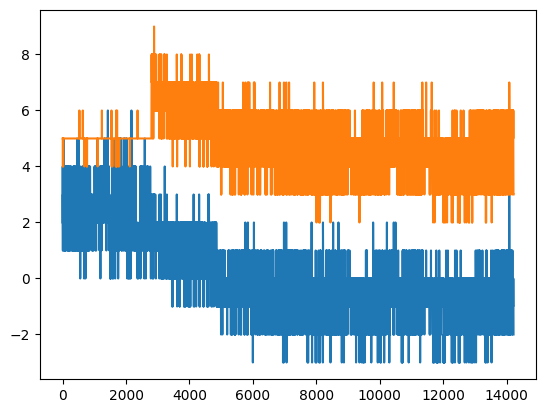

In [132]:
plt.plot(xshifts[2] )
plt.plot(xshifts[1] + 5)

In [108]:
all_ops[0].keys()

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass'

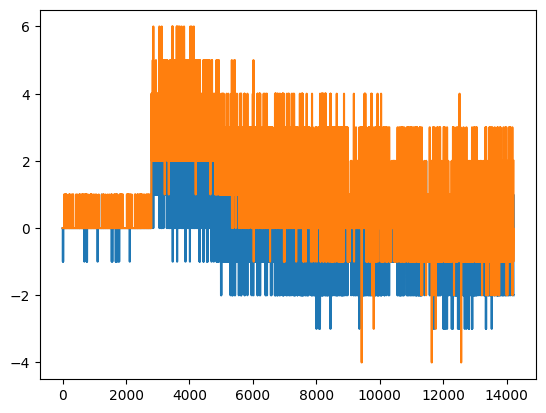

In [111]:
plt.plot(all_ops[0]['xoff'])
plt.plot(all_ops[0]['yoff'])

In [59]:
from suite2p.registration import metrics

ops = metrics.get_pc_metrics(ops['reg_file'], ops, use_red=False)

KeyError: 'reg_file'